## Лабораторная работа №7: Линейная Регрессия

### Каткова Полина

0.0. Найти и загрузить датасет, подгодящий для регрессии

Ссылка: https://www.kaggle.com/dwdkills/russian-demography

Dataset has 2380 rows and 7 columns. Keys for columns:

"year" - year (1990-2017)

"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast

"npg" - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate

"birth_rate" - number of births by 1000 people

"death_rate" - number of deaths by 1000 people

"gdw" - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years

"urbanization" - % of urban population

In [1]:
import pandas as pd
import numpy as np
import sklearn, sklearn.model_selection, sklearn.neighbors, sklearn.svm

In [2]:
#считывем данные
df = pd.read_csv('demography.csv')
df.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01


In [3]:
#Выбираем регион Samara Oblast
df = df.loc[df.region == 'Samara Oblast']
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
58,1990,Samara Oblast,1.2,12.3,11.1,72.58,80.75
143,1991,Samara Oblast,-0.2,11.0,11.2,72.76,80.87
228,1992,Samara Oblast,-1.9,9.9,11.8,73.00,80.63
313,1993,Samara Oblast,-4.9,9.1,14.0,72.79,80.51
398,1994,Samara Oblast,-6.1,9.1,15.2,72.19,80.41
483,1995,Samara Oblast,-6.2,8.6,14.8,71.22,80.38
568,1996,Samara Oblast,-6.3,8.0,14.3,70.88,80.61
653,1997,Samara Oblast,-5.7,7.7,13.4,70.66,80.60
738,1998,Samara Oblast,-5.7,7.9,13.6,69.63,80.60
823,1999,Samara Oblast,-7.6,7.5,15.1,68.03,80.58


0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [4]:
df = df.drop(['region'], axis=1)

0.5. Визуализировать heatmap-матрицу кореллированности признаков.

In [5]:
import seaborn as sns
%matplotlib inline

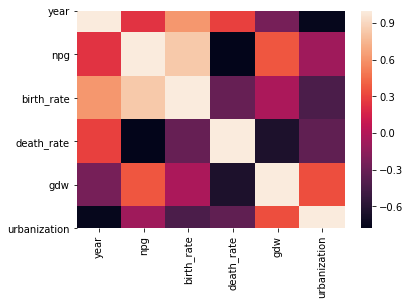

In [6]:
#heatmap-матрица
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

0.6. Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё).

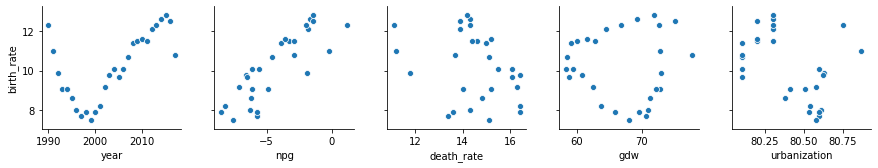

In [7]:
#взаимосвязь между birth rate и каждым из признаков
y = df.birth_rate
X = df.drop('birth_rate', axis = 1)
sns.pairplot(data = df, y_vars = ['birth_rate'], x_vars = X.columns)

0.8. Разделить на обучающую и тестовую выборки

In [8]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 42
)

#### 1.: Опробовать линейную регрессию

1.1. Обучить модель линейной регрессии (LinearRegression)

In [43]:
lm = sklearn.linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

1.2. Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [44]:
#MAE train and test
print(sklearn.metrics.mean_absolute_error(y_train, lm.predict(X_train)), 
      sklearn.metrics.mean_absolute_error(y_test, lm.predict(X_test)))

0.0355909631537524 0.02472240335729684


In [45]:
#MSE train and test
print(sklearn.metrics.mean_squared_error(y_train, lm.predict(X_train)), 
      sklearn.metrics.mean_squared_error(y_test, lm.predict(X_test)))

0.002394674431790194 0.0014465363841309946


In [46]:
#R2 train and test
print(sklearn.metrics.r2_score(y_train, lm.predict(X_train)), 
      sklearn.metrics.r2_score(y_test, lm.predict(X_test)))

0.9990146935767685 0.9996201078206538


1.3. Вывести model.coef_ и model.intercept_

In [47]:
#model.coef_ и model.intercept_
print(lm.coef_, '\n' ,lm.intercept_)

[-0.0022455   0.9907943   0.96030771 -0.0119775  -0.24536921] 
 25.606975698320298


1.4. Построить график (barh) с важностью коэфициентов при соответствующих признаках

In [48]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    plt.barh(range(len(model.coef_)), model.coef_)
    plt.yticks(range(len(model.coef_)), X)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

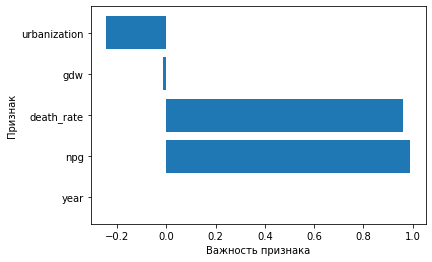

In [49]:
#визуализируем важности признаков
plot_feature_importances( lm )

In [50]:
#находим 3 самых важных признака
features = []
for name, score in zip( X, lm.coef_):
    features.append([name, score])
features.sort(key = lambda x: x[1], reverse = True)
features[0: 3]

[['npg', 0.9907942952325903],
 ['death_rate', 0.9603077088066685],
 ['year', -0.0022455043826404664]]

#### 2.: Опробовать регрессию Lasso

2.1. Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
#создаем модель
ml2 = Lasso()
(-50,50,1000)
param = {'alpha': np.linspace(-50,50,100)}
lasso_grid = GridSearchCV(ml2 ,param)

In [53]:
lasso_grid.fit(X_train, y_train)
# наилучший параметр alpha
lasso_grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583.6227165898308, tolerance: 0.003808928571428571
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.9382642609999, tolerance: 0.003808928571428571
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490.25

{'alpha': 0.5050505050505052}

In [54]:
ml2 = lasso_grid.best_estimator_

2.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [55]:
#MAE train and test
print(sklearn.metrics.mean_absolute_error(y_train, ml2.predict(X_train)), 
      sklearn.metrics.mean_absolute_error(y_test, ml2.predict(X_test)))

0.38803286230728606 0.6290016362506804


In [56]:
#MSE train and test
print(sklearn.metrics.mean_squared_error(y_train, ml2.predict(X_train)), 
      sklearn.metrics.mean_squared_error(y_test, ml2.predict(X_test)))

0.23681855398333027 0.7208169837630756


In [57]:
#R2 train and test
print(sklearn.metrics.r2_score(y_train, ml2.predict(X_train)), 
      sklearn.metrics.r2_score(y_test, ml2.predict(X_test)))

0.9025592626360808 0.8106976513860504


2.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [58]:
#model.coef_ и model.intercept_
print(ml2.coef_, '\n' ,ml2.intercept_)

[ 0.08887172  0.3719208  -0.         -0.03258632 -0.        ] 
 -164.0404965981811


2.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

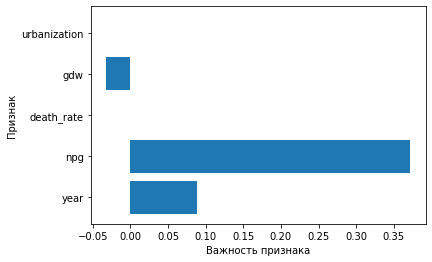

In [59]:
#визуализируем важности признаков
plot_feature_importances( ml2 )

#### 3.: Опробовать регрессию Ridge

3.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [60]:
from sklearn.linear_model import Ridge

In [61]:
# создаем модель
mr = Ridge()
params = {'alpha': np.linspace(-50,50,100)}
ridge_grid = GridSearchCV(mr ,params)

In [108]:
ridge_grid.fit(X_train, y_train)
# наилучший параметр alpha
ridge_grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'alpha': 0.5050505050505052}

In [109]:
mr = ridge_grid.best_estimator_

3.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [64]:
#MAE train and test
print(sklearn.metrics.mean_absolute_error(y_train, mr.predict(X_train)), 
      sklearn.metrics.mean_absolute_error(y_test, mr.predict(X_test)))

0.07249906858344383 0.1149603109154673


In [65]:
#MSE train and test
print(sklearn.metrics.mean_squared_error(y_train, mr.predict(X_train)), 
      sklearn.metrics.mean_squared_error(y_test, mr.predict(X_test)))

0.00822630026417809 0.018803045692175537


In [66]:
#R2 train and test
#MSE train and test
print(sklearn.metrics.r2_score(y_train, mr.predict(X_train)), 
      sklearn.metrics.r2_score(y_test, mr.predict(X_test)))

0.9966152281988221 0.995061907820149


3.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [67]:
#model.coef_ и model.intercept_
print(mr.coef_, '\n' ,mr.intercept_)

[ 0.01532083  0.89377413  0.77833534 -0.02219158 -0.10203636] 
 -18.204156478608393


3.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

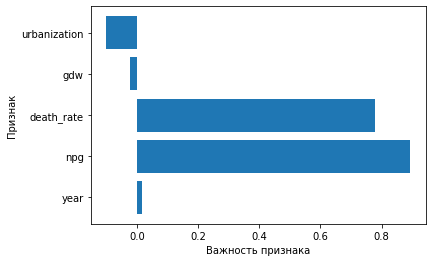

In [68]:
#визуализируем важности признаков
plot_feature_importances( mr )

#### 4.: Опробовать регрессию ElasticNet

4.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [93]:
#создаем модель
em = ElasticNet()
params = {'alpha': np.linspace(0,1,100), 'l1_ratio': np.linspace(0, 1, 100)}
elastic = GridSearchCV(em ,params)

In [94]:
elastic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramDa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007028359636893447, tolerance: 0.003375714285714287
  posi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013742363513920608, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.285806738816162, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1908747263221946, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2620651653925927, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.615838815494265, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.269518582540712, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4671609478404375, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0820691693356554, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.546054571472419, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.788317131731947, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.252308488040021, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.511428628641777, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.809832054367254, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.245665130701106, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.291862735285632, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.661433509509852, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.111692820576604, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.946227923768662, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.39694723041309, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.878379215864502, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.508137717101636, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.045518009324258, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.564238134003112, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.998976357807342, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.625410578898421, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.182643410785992, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.43333214098849, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.149153873281936, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.0404...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [95]:
# наилучший параметр alpha
elastic.best_params_

{'alpha': 0.0, 'l1_ratio': 0.0}

In [91]:
#создаем наилучшую модель
em = elastic.best_estimator_

4.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [73]:
#MAE train and test
print(sklearn.metrics.mean_absolute_error(y_train, em.predict(X_train)), 
      sklearn.metrics.mean_absolute_error(y_test, em.predict(X_test)))

0.03559096315375088 0.02472240335729608


In [74]:
#MSE train and test
print(sklearn.metrics.mean_squared_error(y_train, em.predict(X_train)), 
      sklearn.metrics.mean_squared_error(y_test, em.predict(X_test)))

0.0023946744317902106 0.0014465363841308398


In [75]:
#R2 train and test
print(sklearn.metrics.r2_score(y_train, em.predict(X_train)), 
      sklearn.metrics.r2_score(y_test, em.predict(X_test)))

0.9990146935767685 0.9996201078206538


4.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [76]:
#model.coef_ и model.intercept_
print(em.coef_, '\n' ,em.intercept_)

[-0.0022455   0.9907943   0.96030771 -0.0119775  -0.24536921] 
 25.606975698333684


4.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

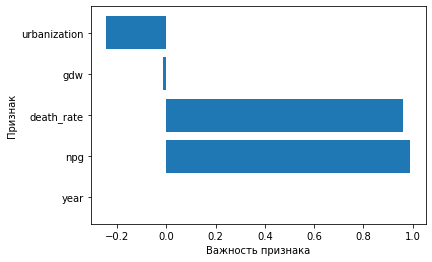

In [77]:
#визуализируем важности признаков
plot_feature_importances( em )

5.0. Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

In [83]:
#выводим mse каждой модели. Наименьший MSE у ELASTIC
print("regression mse "+str(sklearn.metrics.mean_squared_error(y_test, lm.predict(X_test))))
print("lasso mse "+str(sklearn.metrics.mean_squared_error(y_test, ml2.predict(X_test))))
print("Ridge mse "+str(sklearn.metrics.mean_squared_error(y_test, mr.predict(X_test))))
print("elastic mse "+str(sklearn.metrics.mean_squared_error(y_test, em.predict(X_test))))

regression mse 0.0014465363841309946
lasso mse 0.7208169837630756
Ridge mse 0.018803045692175537
elastic mse 0.0014465363841308398


In [85]:
#так как категориальный признак имеет одно значение во всех строках, его можно не возвращать

5.3. Прогоняем наш датасет (X)  через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [86]:
#создаем StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
#нормализируем X
norm = scaler.fit_transform(X)

In [89]:
#делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   norm , y, random_state = 42
)

In [96]:
#создаем модель
em = ElasticNet()
params = {'alpha': np.linspace(0,1,100), 'l1_ratio': np.linspace(0, 1, 100)}
elastic = GridSearchCV(em ,params)

In [97]:
elastic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramDa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013742363513920608, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Program

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013742363513920608, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015500584016917212, tolerance: 0.004558357142857144
  posi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013742363513920608, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Program

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9347113871150222, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8761599866343134, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9206218894191426, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4579001996984084, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.128790858891077, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3216252694357395, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9639111195007874, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.445746230615872, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.683727935380912, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.154264211941214, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.432508392528023, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.725121937580871, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.161153248632035, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.226767935708496, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.589378655079909, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.037401529236554, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.890955032625742, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.33401241812662, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.812253716508172, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.460253657343905, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.989618631702827, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.504848723755824, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.956872592110765, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.575172373478512, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.128926485824362, tolerance: 0.004558357142857144
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.395881790508183, tolerance: 0.003375714285714287
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.103602665350099, tolerance: 0.004217214285714286
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.0404...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [98]:
# наилучший параметр alpha
elastic.best_params_

{'alpha': 0.0, 'l1_ratio': 0.0}

In [100]:
#создаем наилучшую модель
em = elastic.best_estimator_

In [104]:
#MAE test
print(sklearn.metrics.mean_absolute_error(y_test, em.predict(X_test)))

0.03715221603233486


In [105]:
#MSE  test
print(sklearn.metrics.mean_squared_error(y_test, em.predict(X_test)))

0.0024376279821203485


In [106]:
#R2  test
print(sklearn.metrics.r2_score(y_test, em.predict(X_test)))

0.9989459603677736


5.4. Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

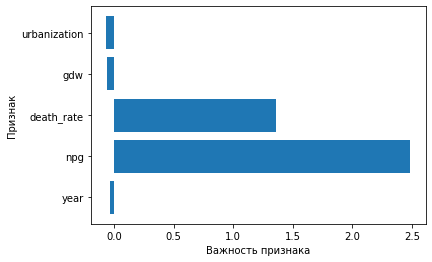

In [107]:
#визуализируем важности признаков
plot_feature_importances( em )